In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load data

In [2]:
cd ../

/home/mbanga/Documents/Epfl/ml_revisions


In [3]:
from clustering.helper import load_data, normalize_data

data = load_data()

In [4]:
data.shape

(272, 2)

### Initialize your cluster centers

In [5]:
def initialize_clusters(data, k):
    """initialize the k cluster centers (the means).
    input:
        data: original data with shape (num_sample, num_feature).
        k: predefined number of clusters for the k-means algorithm.
    output:
        a numpy array with shape (k, num_feature)
    """
    # mean and standard deviation across each data dimension
    mean = np.mean(data, axis=0)
    std  = np.std(data, axis=0)
    
    num_feature = data.shape[1]
    clusters = np.empty((k, num_feature))
    # random samples from gaussian with mean
    # and standard deviation across every dimension
    # equal to data
    for i in range(k):
        for j in range(num_feature):
            s = np.random.normal(mean[j], std[j])
            clusters[i, j] = s
    return clusters
    

### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

In [6]:
def build_distance_matrix(data, mu):
    """build a distance matrix.
    return
        distance matrix:
            row of the matrix represents the data point,
            column of the matrix represents the k-th cluster.
    """
    # dims of distance matrix
    N, K = data.shape[0], mu.shape[0]
    rows, cols = np.indices((N, K))
    points = data[rows.ravel()]
    centers = mu[cols.ravel()]
    distances = np.sqrt(np.sum((points - centers)**2))
    distances = distances.reshape((N, K))
    
    return distances

In [7]:
from scipy.spatial.distance import cdist

def build_distance_matrix(data, mu):
    """build a distance matrix.
    return
        distance matrix:
            row of the matrix represents the data point,
            column of the matrix represents the k-th cluster.
    """
    return cdist(data, mu)

#### Update k-means parameters

In [8]:
t = np.array([[3, 6, 1], [4, 2, 8], [3, 5, 2]])
b = np.argmin(t, axis=1)

n_features = 5
n_samples = t.shape[0]
assignments = np.zeros((n_samples, n_features))
assignments[np.arange(0, n_samples), b] = 1
assignments, b
np.where(b==1)
rows, cols = np.where(b.reshape(b.shape[0], 1)==1)
# b[:, np.newaxis].shape
rows

array([1])

In [9]:
def update_kmeans_parameters(data, mu_old):
    """update the parameter of kmeans
    return:
        losses: loss of each data point with shape (num_samples, 1)
        assignments: assignments vector z with shape (num_samples, 1)
        mu: mean vector mu with shape (k, num_features)
    """
    K = mu_old.shape[0]
    num_samples = data.shape[0]
    num_features = data.shape[1]
    # assignments
    z = np.argmin(build_distance_matrix(data, mu_old), axis=1)
    # losses
    losses = np.sqrt(np.sum((data - mu_old[z])**2, axis=1))
    losses = losses[:, np.newaxis]
    # mean vector
    mu = np.empty((K, num_features))
    for k in range(K):
        points_k = data[z == k] # points in cluster k
        num_points = points_k.shape[0] # num points in cluster k
        mu[k] = np.sum(points_k, axis=0) / num_points
    assignments = z[:, np.newaxis]

    return losses, assignments, mu

#### Play with k-means

The current iteration of k-means is: 0,                the average loss is 11.450313124958187.


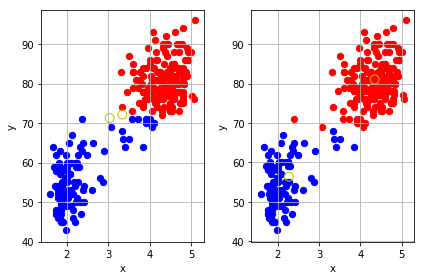

The current iteration of k-means is: 1,                the average loss is 4.8078087051903795.


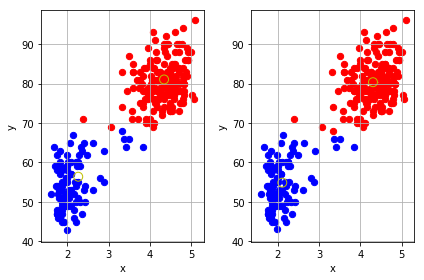

The current iteration of k-means is: 2,                the average loss is 4.686722544208671.


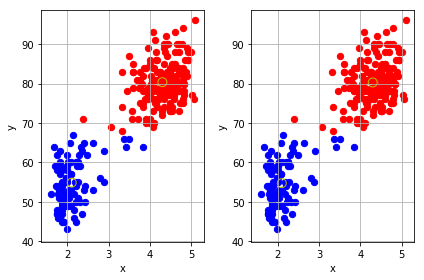

The current iteration of k-means is: 3,                the average loss is 4.68244411160236.


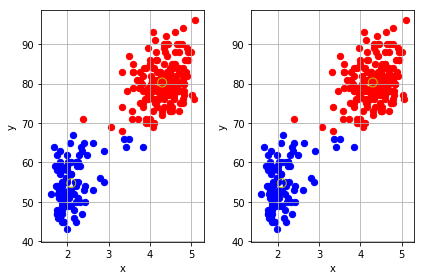

The current iteration of k-means is: 4,                the average loss is 4.68244411160236.


In [10]:
from helper import build_dir
from plots import plot

def kmeans(data, k, max_iters, threshold):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iter))
        # update k-means information.
        mu_old = mu

# define parameters
k = 2
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
kmeans(data, k, max_iters, threshold)

## Using k-means for image compresson

#### load image

In [13]:
from helper import load_image

image_path = "clustering/mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype))

Original image: the shape of image=(480, 480, 3), the data type=uint8.


#### preprocess image

In [ ]:
def preprocess_image(original_image):
    """preprocess the image."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: vectorize and normalize the original_image.
    # *************************************************** 
    
    return processed_image

processed_image = preprocess_image(original_image)

In [ ]:
from plots import plot_image_compression

def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: use kmean to compress the image.
    # *************************************************** 
    raise NotImplementedError

    # plot histgram
    plot_image_compression(original_image, processed_image, assignments, mu, k)

# define parameters
k = 5
max_iter = 100
threshold = 1e-6

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)